In [1]:
import os 
import numpy as np

In [2]:
is_init = False
print(os.listdir('test'))
for dir in os.listdir('test'):
	for i in os.listdir('test/'+dir):
		if(i.split('.')[-1] == 'npy'):
			print(i.split('.')[0])
			if(not is_init):
				is_init = True
				X = np.load('test/' + dir + '/' +i)
				size = X.shape[0]
				y = np.array([dir]*size) 
			else:
				x = np.load('test/' + dir + '/' +i)
				size = x.shape[0]
				X = np.concatenate((X , x),axis=0)
				y = np.concatenate((y,np.array([(dir)]*size)),axis=0)
print(X.shape,y.shape)

['Angry', 'Happy', 'Love', 'Neutral', 'Rock', 'Sad']
txtIBTRUPf2I6IRoOFlt
Yv8tR5ZzsG6WbpXDViOd
3HJxpC2fO02NiNzjx5AE
r3pMqVKWijIAO0Dxk4HS
3DLgLoLIT4STxzUrvQKf
6rY28JhkYiVxrXIpp6pi
IYfAZCcrFLd8hRP7Oiwd
M8jW6Zea7cw1ukTm9mBI
mLc50Z4kq2Ws1kaN81gt
Rtzw76YSzLlBXacf8mkw
aGrRTv0hny09Vm7ttwXh
EdFRdSOWILmHaA9uhYos
(5012, 1020) (5012,)


In [3]:
print(y)

['Angry' 'Angry' 'Angry' ... 'Sad' 'Sad' 'Sad']


In [4]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
labels = np.load('Models/labels.npy')
y = lc.fit(labels).transform(y)
print(labels)
print(y)

['Angry' 'Happy' 'Love' 'Neutral' 'Rock' 'Sad']
[0 0 0 ... 5 5 5]


In [5]:
# one hot encode y
from keras.utils import to_categorical

y = to_categorical(y)

In [6]:
num_rows = X.shape[0]
shuffled_indices = np.random.permutation(num_rows)
X = X[shuffled_indices]
y = y[shuffled_indices]
print(X.shape)

(5012, 1020)


In [7]:
from keras.models import load_model
model = load_model('./Models/model.keras')
y_pred= model.predict(X)
y_new = np.zeros([y.shape[0] , y.shape[1]] , dtype=int)
for i in range(y_pred.shape[0]):
	y_new[i][np.argmax(y_pred[i])] = 1
y_pred = y_new

157/157 [==============================] - 0s 2ms/step


In [8]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
print("Classification Report")
print(classification_report(y, y_pred, target_names=labels))
print(f"Accuracy: {accuracy_score(y, y_pred)}")


Classification Report
              precision    recall  f1-score   support

       Angry       0.57      0.67      0.61       802
       Happy       0.92      0.79      0.85       802
        Love       0.94      0.81      0.87       802
     Neutral       0.88      0.54      0.67      1002
        Rock       0.91      0.74      0.82       802
         Sad       0.55      0.98      0.70       802

   micro avg       0.74      0.74      0.74      5012
   macro avg       0.79      0.75      0.75      5012
weighted avg       0.80      0.74      0.75      5012
 samples avg       0.74      0.74      0.74      5012

Accuracy: 0.7440143655227454


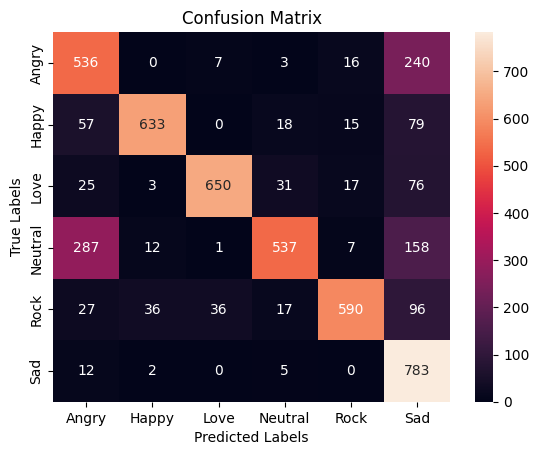

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
cm = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

In [10]:
cm = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[536   0   7   3  16 240]
 [ 57 633   0  18  15  79]
 [ 25   3 650  31  17  76]
 [287  12   1 537   7 158]
 [ 27  36  36  17 590  96]
 [ 12   2   0   5   0 783]]
